In [77]:
#Two clustering methods are presented in this paper: Hierarchical and K-means.

#General operation :
#1) Obtain the optimal number of clusterings by employing dendograms and the elbow method.
#2) Train and test models
#3) Calculate the performance of each model used.

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
import numpy as np
from matplotlib import pyplot as plt


In [79]:
Mall_Customer = pd.read_csv(r"C:\..............\Mall_Customers.csv")
X = Mall_Customer.iloc[:, [3, 4]].values

Live = pd.read_csv(r"C:\Users\.............\Wholesale customers data.csv")
XLive = Live.iloc[:, [3, 4]].values 

car = pd.read_csv(r"C:\Users\........\car.csv")
car_df= car.iloc[:, 0:4].values

heart_disease = pd.read_csv(r"C:\Users\.........\heart_disease.csv")
heart_disease_df= heart_disease.iloc[:,0:10].values

In [80]:
dataset_X=[X,XLive,car_df,datasets.load_iris().data,heart_disease_df]
dataset_Y=['v','v','a',datasets.load_iris().target,heart_disease_y]

methods=["Hierarchical","K-means"]
names=["Mall_customers","Live","car","Iris","heart"]


In [81]:
#In this function we will obtain the optimal number of clusters applying  dendrogams:

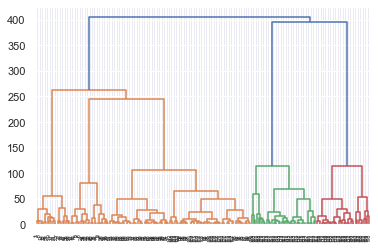

In [82]:
#optimal number of clusters= 5
dendrogram = sch.dendrogram(sch.linkage(dataset_X[0], method='ward')) #The distance between clusters is the sum of squared differences within all clusters

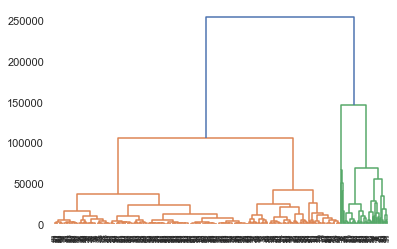

In [17]:
#optimal number of clusters= 2
dendrogram = sch.dendrogram(sch.linkage(dataset_X[1], method='ward')) #The distance between clusters is the sum of squared differences within all clusters

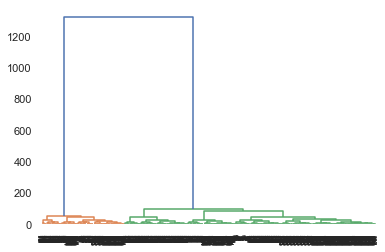

In [18]:
#optimal number of clusters= 2
dendrogram = sch.dendrogram(sch.linkage(dataset_X[2], method='ward')) #The distance between clusters is the sum of squared differences within all clusters

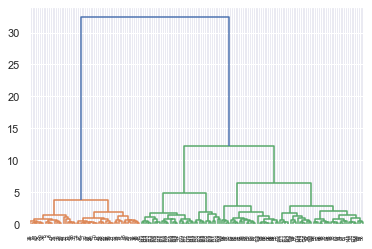

In [29]:
#optimal number of clusters= 2
dendrogram = sch.dendrogram(sch.linkage(dataset_X[3], method='ward')) #The distance between clusters is the sum of squared differences within all clusters

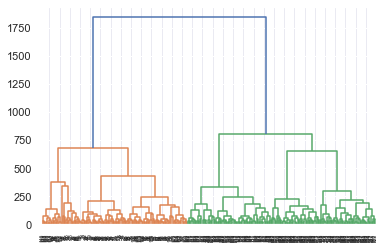

In [54]:
#optimal number of clusters= 2
dendrogram = sch.dendrogram(sch.linkage(dataset_X[4], method='ward')) #The distance between clusters is the sum of squared differences within all clusters

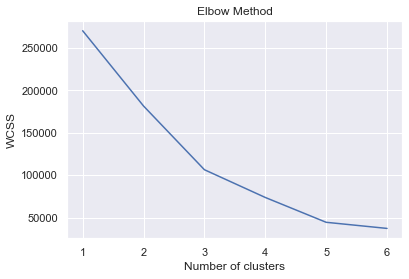

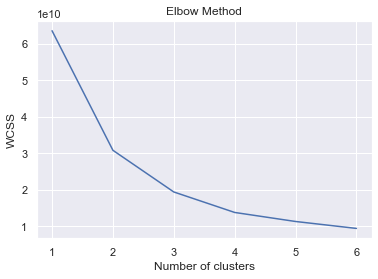

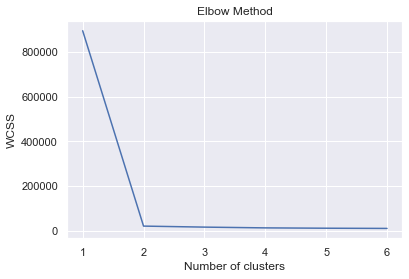

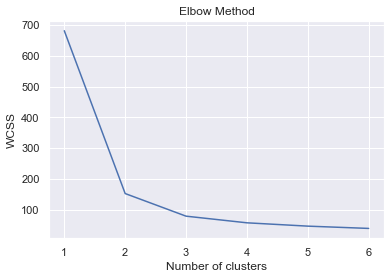

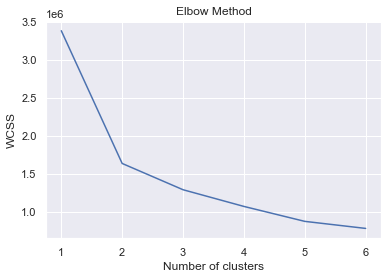

In [83]:
#In this function we will obtain the optimal number of clusters but applying the elbow method.
def KMeeans():
    for k in range (len(dataset_X)):
        wcss = []
        for i in range(1, 7):
            kmeans = KMeans(n_clusters=i,max_iter=100, n_init=10, random_state=0)
            kmeans.fit(dataset_X[k])
            wcss.append(kmeans.inertia_)
        plt.plot(range(1, 7), wcss)
        plt.title('Elbow Method')
        plt.xlabel('Number of clusters')
        plt.ylabel('WCSS')
        plt.show()
        
KMeeans()

In [84]:
def plotKmeans(j,nC):   
    kmeans = KMeans(n_clusters=nC, init='k-means++', max_iter=300, n_init=3, random_state=0)
    pred = kmeans.fit(dataset_X[j])
    pred_y = pred.predict(dataset_X[j])
    mediciones(j,pred_y)
    plt.scatter(dataset_X[j][:,0], dataset_X[j][:,1])
    plt.scatter(pred.cluster_centers_[:, 0], pred.cluster_centers_[:, 1], s=300, c='red')
    plt.show()
    

def Hierarchical(i,nC):
    model = AgglomerativeClustering(n_clusters=nC, affinity='euclidean', linkage='ward')
    labels=model.fit_predict(dataset_X[i]) #= labels = model.labels_
    mediciones(i,labels)
    return labels
    
def plots(i,nC,labels):
    j=0
    colors=['red','blue','green','purple','orange',"pink"]
    for x in range(nC):
        plt.scatter(dataset_X[i][labels==j, 0], dataset_X[i][labels==j, 1], s=50, marker='o', color=colors[j])
        
        j=j+1
    plt.title('Clusters of Customers (Hierarchical Clustering Model)')
    plt.xlabel(nameFeatX[i])
    plt.ylabel(nameFeatY[i])
    plt.show()

In [85]:
from sklearn.metrics import davies_bouldin_score
def mediciones(i,predictions):
        print("silhouette_score: ",metrics.silhouette_score(dataset_X[i], predictions, metric='euclidean')) #The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.
        print("davies_bouldin_score: ",davies_bouldin_score(dataset_X[i], predictions)) # davies_bouldin_score  0 is the lowest possible score. Values closer to zero indicate a better partition.

Data set :   Mall_customers

 ================================ Hierarchical =================================
silhouette_score:  0.5529945955148897
davies_bouldin_score:  0.5782207452369452


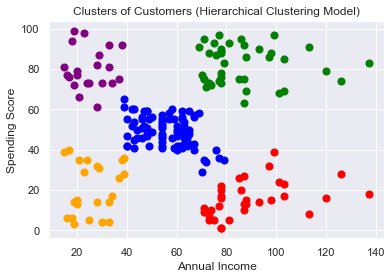

================================ K-means =================================
silhouette_score:  0.5532176107575425
davies_bouldin_score:  0.5711417089519232


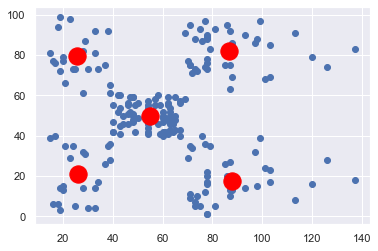

Data set :   Live

 ================================ Hierarchical =================================
silhouette_score:  0.6802026609060738
davies_bouldin_score:  0.7318062980317167


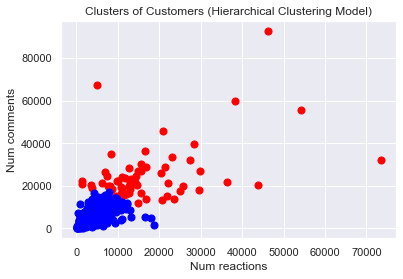

================================ K-means =================================
silhouette_score:  0.6961488782412818
davies_bouldin_score:  0.712134856849286


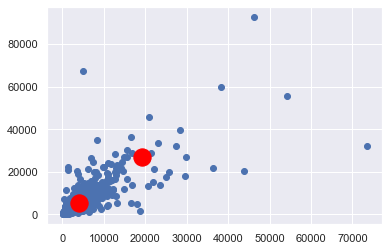

Data set :   car

 ================================ Hierarchical =================================
silhouette_score:  0.9148315549103896
davies_bouldin_score:  0.12183904343185553


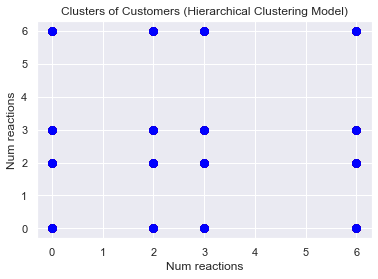

================================ K-means =================================
silhouette_score:  0.9148315549103896
davies_bouldin_score:  0.12183904343185553


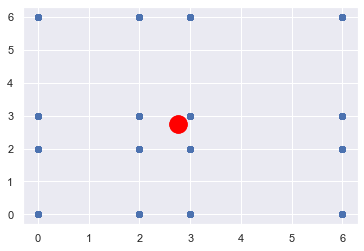

Data set :   Iris

 ================================ Hierarchical =================================
silhouette_score:  0.6867350732769776
davies_bouldin_score:  0.3827528421006873


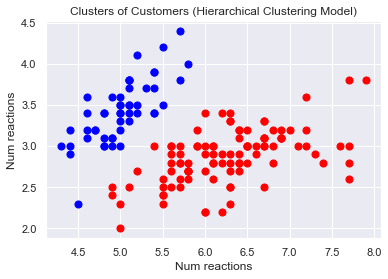

================================ K-means =================================
silhouette_score:  0.681046169211746
davies_bouldin_score:  0.4042928371730438


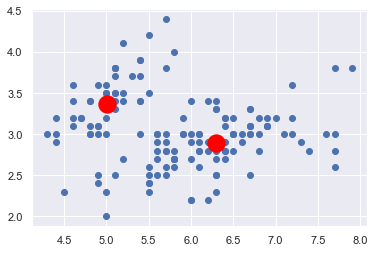

Data set :   heart

 ================================ Hierarchical =================================
silhouette_score:  0.4184239790739004
davies_bouldin_score:  0.8940323030428441


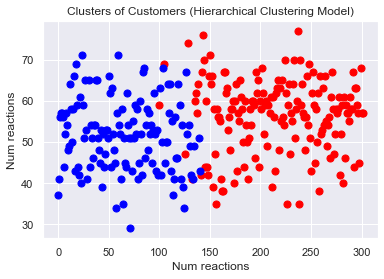

================================ K-means =================================
silhouette_score:  0.4293986574343122
davies_bouldin_score:  0.8838060094089283


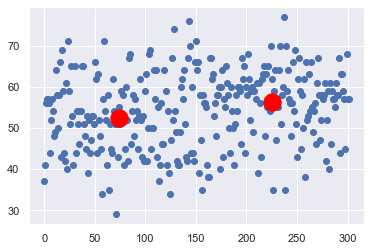

In [86]:
def main():
    i=0
    nC=[5,2,2,2,2] # These numbers were obtained from the previous functions (dendograms and elbow method).
    for x in dataset_X:
        print("Data set :  ",names[i])
        print("\n ================================",methods[0],"=================================")
        labels=Hierarchical(i,nC[i]) 
        plots(i,nC[i],labels)
        print("================================",methods[1],"=================================")
        plotKmeans(i,nC[i])
        i=i+1     
main()

